In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
plt.style.use('default')

<div style="text-align: center; margin-top: 2px;">
    <a href="https://www.linkedin.com/in/sohaib-awan-042b68244" target="_blank">
        <button style="background-color: #0077b5; color: #fff; padding: 15px 30px; border-radius: 40px;border-color: blue; font-size: 18px; font-weight: bold; cursor: pointer;">LinkedIn</button>
    </a>
</div>

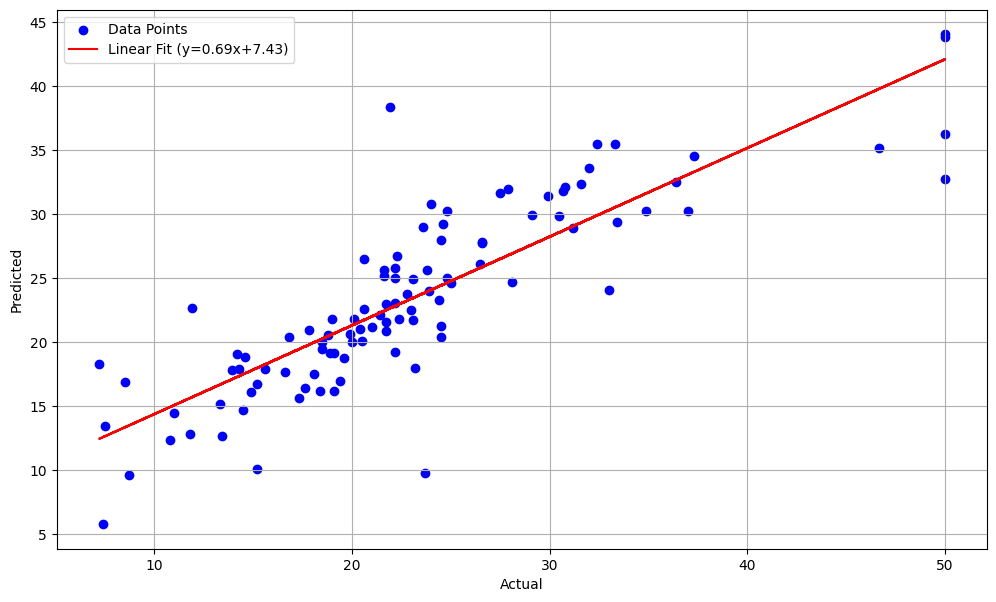

In [104]:
boston = pd.read_csv("D:\\PROGRAMMING\\Datasets\\Boston.csv")
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


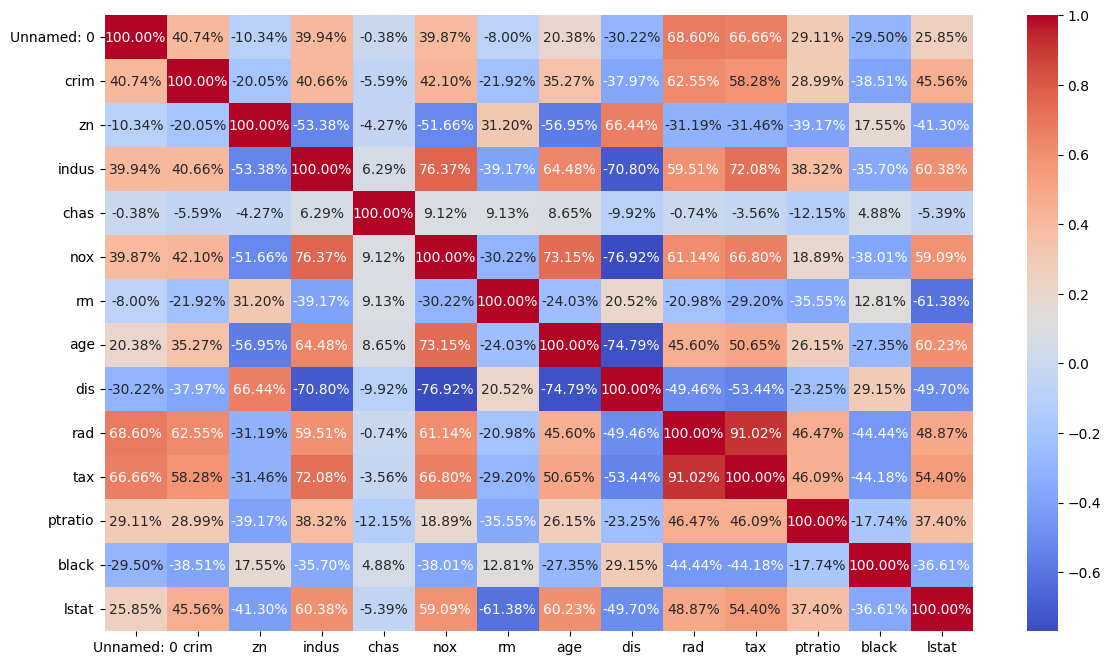

In [105]:
## Splitting the dependent and independent variables
X = pd.DataFrame(boston.iloc[:, :-1])
y = pd.DataFrame(boston.iloc[:, -1])

## Find the correlation among the predictors

plt.figure(figsize=(14, 8))
sb.heatmap(X.corr(), annot=True,fmt=".2%", cmap='coolwarm')
plt.show()

# 'bwr'
# 'tab10'
# 'tab20'
# 'cool'

In [106]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

> Linear Regression

In [107]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

train_predict = mlr.predict(X_train)
print("Train rmse : ", np.sqrt(mean_squared_error(y_train, train_predict)))
print("Train r2   : ", r2_score(y_train, train_predict))

test_predict = mlr.predict(X_test)
print("Test rmse  : ",np.sqrt(mean_squared_error(y_test, test_predict)))
print("Test r2    : ",r2_score(y_test, test_predict))


Train rmse :  4.6774836203152885
Train r2   :  0.7440698089153643
Test rmse  :  4.7239805671467545
Test r2    :  0.7205764695797403


> Ridge Regression

In [108]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

train_predict_rr = rr.predict(X_train)
print("Train rmse : ", np.sqrt(mean_squared_error(y_train, train_predict_rr)))
print("Train r2   : ", r2_score(y_train, train_predict_rr))

test_predict_rr = rr.predict(X_test)
print("Test rmse  : ",np.sqrt(mean_squared_error(y_test, test_predict_rr)))
print("Test r2    : ",r2_score(y_test, test_predict_rr))

Train rmse :  4.6774905973765115
Train r2   :  0.7440690454099889
Test rmse  :  4.72356670172993
Test r2    :  0.7206254277278534


> Lasso Regression

In [109]:
lr = Lasso(alpha=0.01)
lr.fit(X_train, y_train)

train_predict_lr = lr.predict(X_train)
print("Train rmse : ", np.sqrt(mean_squared_error(y_train, train_predict_lr)))
print("Train r2   : ", r2_score(y_train, train_predict_lr))

test_predict_lr = lr.predict(X_test)
print("Test rmse  : ",np.sqrt(mean_squared_error(y_test, test_predict_lr)))
print("Test r2    : ",r2_score(y_test, test_predict_lr))

Train rmse :  4.681255683430059
Train r2   :  0.7436568629085851
Test rmse  :  4.717428378678187
Test r2    :  0.7213510561463168


> ElasticNet

In [110]:
en = ElasticNet(alpha=0.01)
en.fit(X_train, y_train)

train_predict_en = en.predict(X_train)
print("Train rmse : ", np.sqrt(mean_squared_error(y_train, train_predict_en)))
print("Train r2   : ", r2_score(y_train, train_predict_en))

test_predict_en = en.predict(X_test)
print("Test rmse  : ",np.sqrt(mean_squared_error(y_test, test_predict_en)))
print("Test r2    : ",r2_score(y_test, test_predict_en))

Train rmse :  4.7260578699558415
Train r2   :  0.7387266939869732
Test rmse  :  4.732035385347721
Test r2    :  0.7196227719359911


In [111]:
'''
Linear Regression Model: RMSE 4.06 and R-Square is 77.82 percent.
Ridge Regression Model: RMSE 4.06 and R-Square is 77.84 percent.
Lasso Regression Model: RMSE 4.03 and R-Square is 78.06 percent.
Elastic Regression Model: RMSE 4.005 and R-Square is 78.43 percent.
'''

'\nLinear Regression Model: RMSE 4.06 and R-Square is 77.82 percent.\nRidge Regression Model: RMSE 4.06 and R-Square is 77.84 percent.\nLasso Regression Model: RMSE 4.03 and R-Square is 78.06 percent.\nElastic Regression Model: RMSE 4.005 and R-Square is 78.43 percent.\n'

In [112]:
def makeframe(a, p):
    plt.figure(figsize=(12, 7))
    F = pd.DataFrame({'Actual': a.values.flatten(), 'Predicted': p.flatten()})
    
    plt.scatter(F['Actual'], F['Predicted'], c='blue', label='Data Points')
    
    m, b = np.polyfit(F['Actual'], F['Predicted'], 1)
    plt.plot(F['Actual'], m*F['Actual'] + b, color='red', label=f'Linear Fit (y={m:.2f}x+{b:.2f})')
    plt.grid()
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    print(f'Slope (m): {m}')
    print(f'Y-intercept (b): {b}')
    plt.show()

Slope (m): 0.6931504743809619
Y-intercept (b): 7.433488675184875


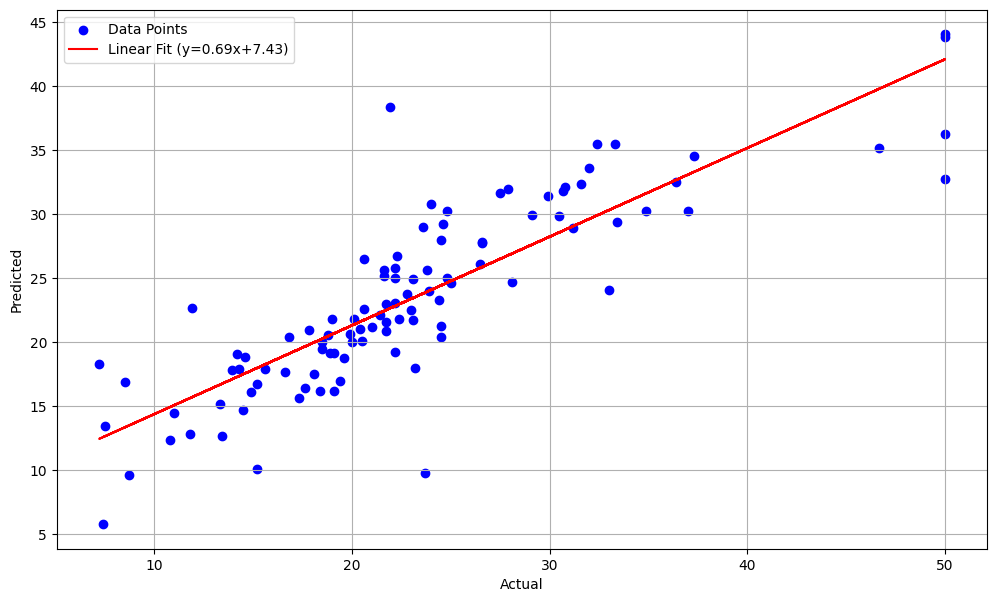

In [113]:
makeframe(y_test, test_predict_en)

Slope (m): 0.694891583975561
Y-intercept (b): 7.4065337178181725


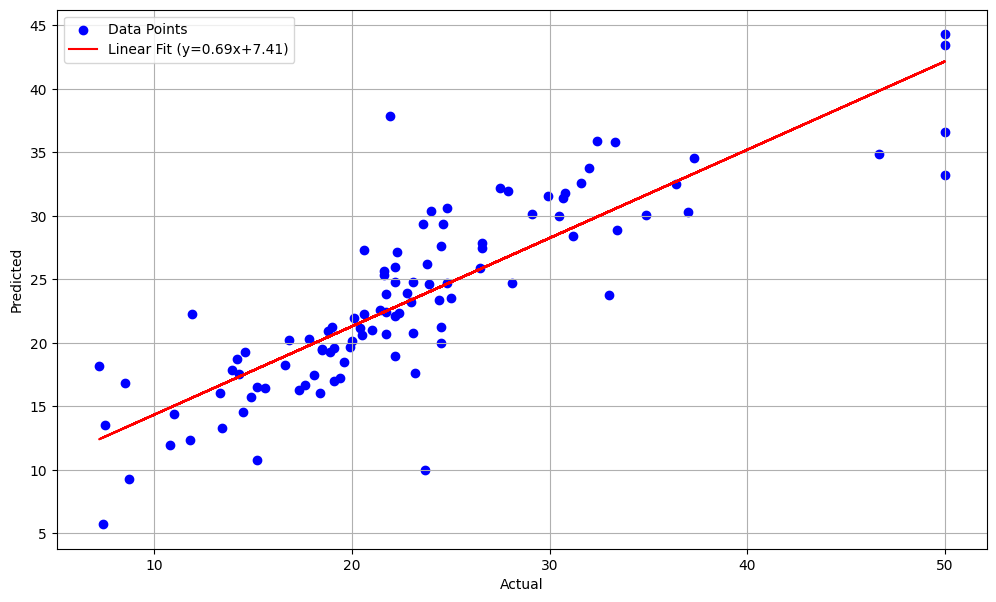

In [114]:
makeframe(y_test, test_predict_lr)

Slope (m): 0.6968100335613295
Y-intercept (b): 7.370955340228284


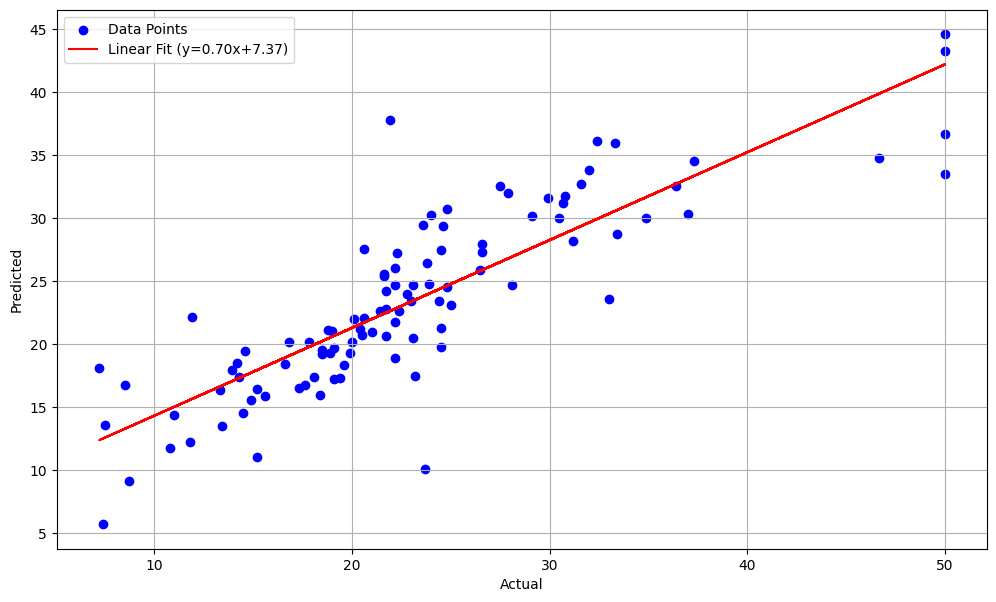

In [115]:
makeframe(y_test, test_predict_rr)

Slope (m): 0.6968315959519802
Y-intercept (b): 7.370609106142719


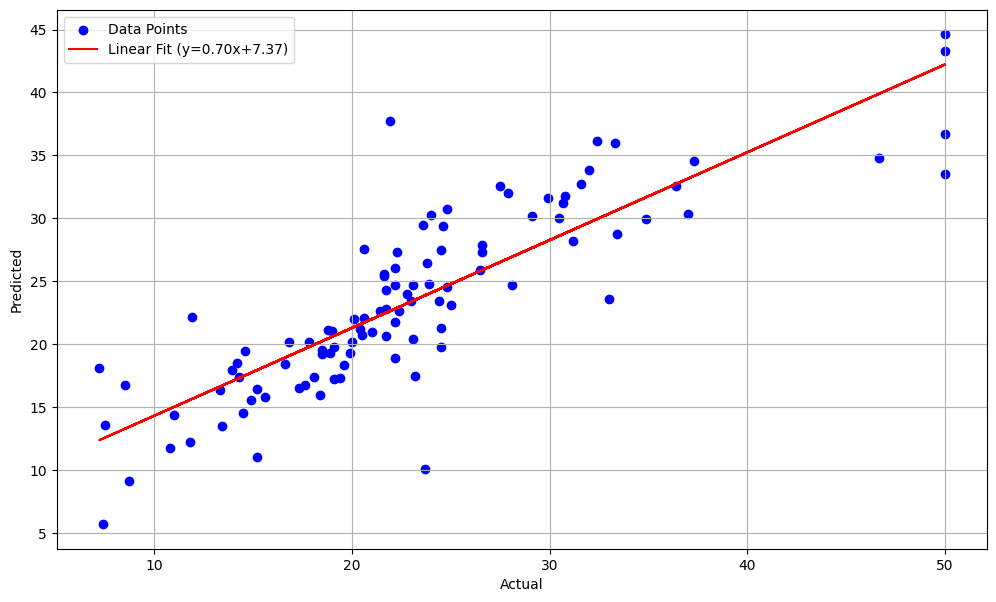

In [116]:
makeframe(y_test, test_predict)

Slope (m): 0.7340167875117009
Y-intercept (b): 5.959143196028068


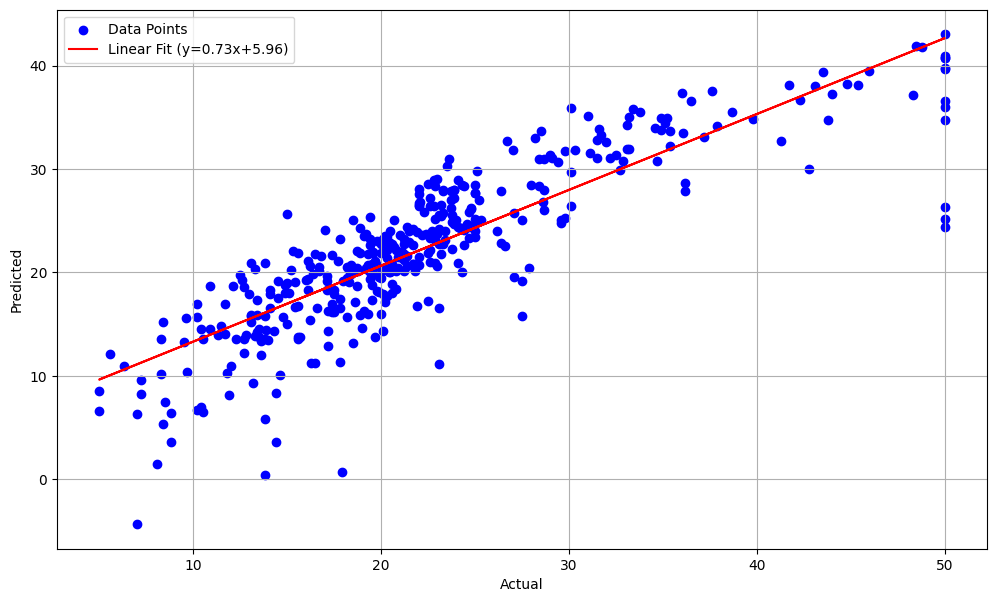

In [117]:
makeframe(y_train, train_predict_en)

Slope (m): 0.7407404215001114
Y-intercept (b): 5.808505502168419


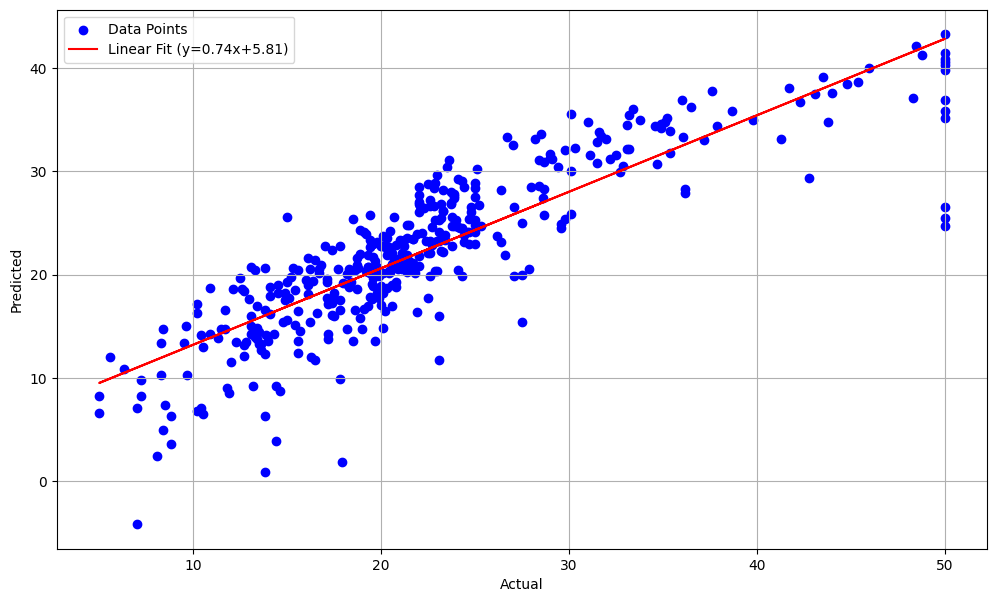

In [118]:
makeframe(y_train, train_predict_lr)

Slope (m): 0.7439648979563923
Y-intercept (b): 5.7362636612062055


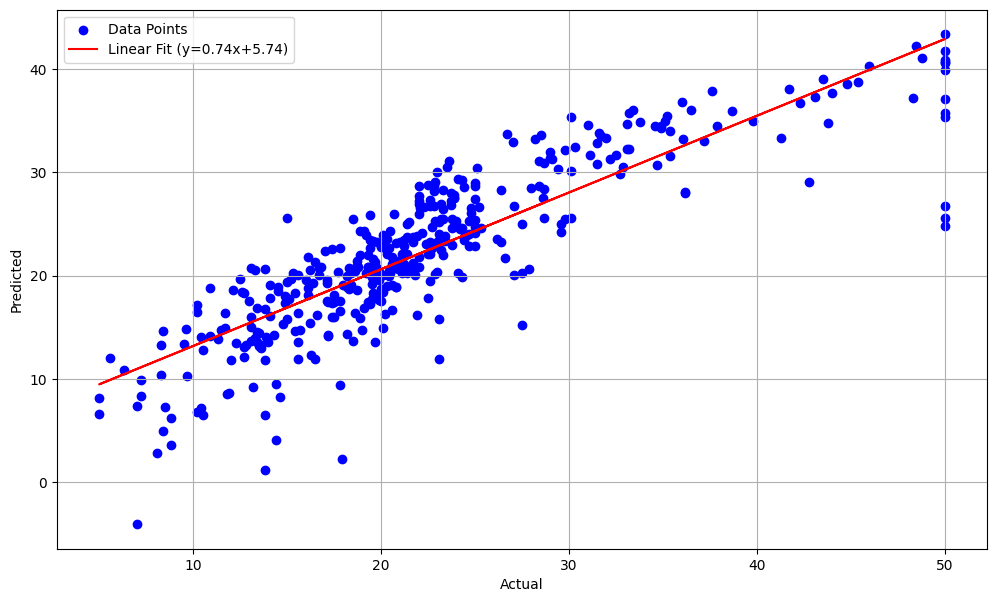

In [119]:
makeframe(y_train, train_predict_rr)

Slope (m): 0.7440698089153626
Y-intercept (b): 5.733913214268259


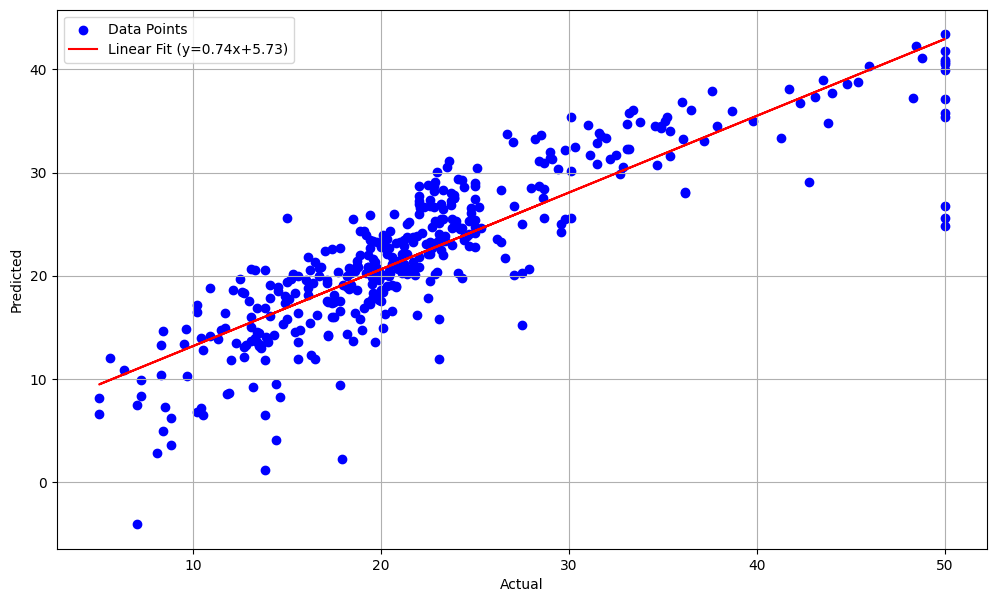

In [120]:
makeframe(y_train, train_predict)